In [ ]:
import tensorflow as tf
#tf.compat.v1.disable_eager_execution()
#https://blog.csdn.net/yuan_xiangjun/article/details/105469721   解决方法
# tensorflow2.0 没有session模块
#创建一个常量运算，将作为一个节点加入到默认计算图中
hello = tf.constant("hello,world!")
#constant 常量值
#sess = tf.compat.v1.Session()
sess =  tf.Session()

print(sess.run(hello))

In [ ]:
node1 = tf.constant(3.0,tf.float32,name="node1")
node2 = tf.constant(4.0,tf.float32,name="node2")
node3 = tf.add(node1,node2)

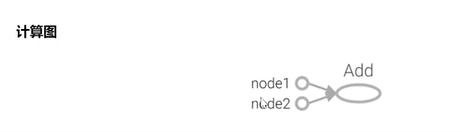

In [ ]:
print(node3)

In [ ]:
print(node1)   

In [ ]:
print(node2)
#输出一个张量的结构

In [ ]:
sess = tf.Session()
print("运行sess.run(node1)结果",sess.run(node1))
sess.close()
#关闭session

In [ ]:
import tensorflow as tf 
tens1 = tf.constant([[[1,2,2],[2,2,3]],
                     [[3,5,6],[5,4,3]],
                     [[7,0,1],[9,1,9]],
                     [[11,12,7],[1,3,14]]],name="tens1")
print(tens1)
#4  最外层 有四个， 2 次一层有2个，最里层有3个

In [ ]:
import tensorflow as tf

scalar = tf.constant(100)
vector = tf.constant([1,2,3,4,5])
matrix = tf.constant([[1,2,3],[4,5,6]])
cube_matrix = tf.constant([[[1],[2],[3]],[[4],[5],[6]],[[7],[8],[9]]])
#shape 张量的维度信息
print(scalar.get_shape())
print(vector.get_shape())
print(matrix.get_shape())
print(cube_matrix.get_shape())

In [ ]:
import tensorflow as tf
tens1 = tf.constant([[[1,2],[2,3]],[[3,4],[5,6]]])
#获取张量的值
sess = tf.Session()
print(sess.run(tens1)[1,1,0])
sess.close()

tensorflow数据类型，
不带小数点的数会被默认为int32
带小数点的会被默认为float32
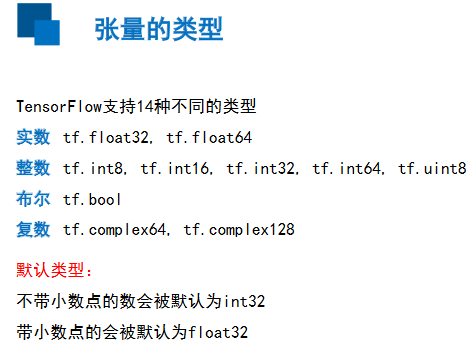
tensorflow会对参与运算的所有张量进行类型的检查， 发现类型不匹配时会报错

In [ ]:
import tensorflow as tf
tf.reset_default_graph()        
#清除default graph和不断增加的节点
a = tf.Variable(1, name="a")   
#定义变量a
b = tf.add(a, 1, name="b")    
#定义操作b为a+1
c= tf.multiply(b, 4, name="c") 
#定义操作c为b*4
d = tf.subtract(c, b, name="d")  
#定义 d为 c-b
logdir = 'E:/log'              
# logdir 改为自己机器上的合适路径
writer = tf.summary.FileWriter(logdir,tf.get_default_graph()) 
# 生成一个写日志的writer,并将当前的tensorflow计算图写入日志
writer.close()

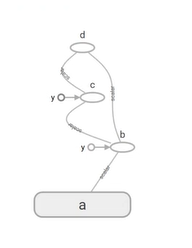

In [ ]:
# 定义计算图
tens1 = tf.constant([1,2,3])
# 创建一个会话
sess = tf.Session()
# 使用这个创建好的会话来得到关心的运算的结果。比如可以调用sess.run(result)
# 来得到张量result的取值
print(sess.run(tens1))
sess.close()
# 关闭会话使得本次运行中使用到的资源可以被释放
# 若程序因异常退出时， 关闭会话函数可能就不会被执行从而导致资源泄露

In [ ]:
# 定义计算图
tens1 = tf.constant([1,2,3])
# 创建一个会话
sess = tf.Session()
# 使用这个创建好的会话来得到关心的运算的结果。比如可以调用sess.run(result)
# 来得到张量result的取值
try:
    print(sess.run(tens1))
except:
    print("exception!")
finally:
    sess.close()
# 关闭会话使得本次运行中使用到的资源可以被释放
# 若程序因异常退出时， 关闭会话函数可能就不会被执行从而导致资源泄露

In [ ]:
node1 = tf.constant(3.0,tf.float32,name="node1")
node2 = tf.constant(4.0,tf.float32,name="node2")
result = tf.add(node1, node2)
# 创建一个会话， 并通过Python中的上下文管理器来管理这个会话
with tf.Session() as sess:
    # 使用这创建好的会话来计算关心的结果
    print(sess.run(result))
# 不需要再调用Session.close()来关闭会话
# 当上下文退出时会话关闭和资源释放也自动完成了

In [ ]:
node1 = tf.constant(3.0,tf.float32,name="node1")
node2 = tf.constant(4.0,tf.float32,name="node2")
result = tf.add(node1, node2)
sess=tf.Session()
with sess.as_default():
    print(result.eval())

In [ ]:
sess = tf.Session()
print(sess.run(result))     
print(result.eval(session=sess)) 
# 前面的语句sess已被注册成缺省的会话  此时若删了session=sess  这个句将不能运行

In [ ]:
#静态的定义
node1 = tf.constant(3.0,tf.float32,name="node1")
node2 = tf.constant(4.0,tf.float32,name="node2")
result = tf.add(node1, node2)



sess = tf.InteractiveSession()
# 使用这个函数会自动将生成的会话注册为默认会话
print(result.eval())
sess.close()

# 常量constant
在运行过程中值不会改变的单元， 在tensorflow中无需进行初始化操作创建语句：
   constant_name = tf.constant(value)

In [ ]:
a = tf.constant(1.0, name='a')
b = tf.constant(2.2, name='b')
c = tf.add(a, b, name='c')

sess = tf.Session()

print(sess.run(c))
sess.close()

# 变量 Variable
在运行过程中值会改变的单元， 在Tensorflow中需进行初始化操作创建语句
name_Variable = tf.Variable(value, name)
个别变量初始化 init_op = name_variable.initializer()
所有变量初始化 init_op = tf.global_variable_initializer()

In [ ]:
node1 = tf.Variable(3.0, tf.float32, name="node1")
node2 = tf.Variable(4.0,tf.float32, name="node2")
result = tf.add(node1,node2,name="add")

sess= tf.Session()
# Session对话变量的创建

#变量初始化init
init = tf.global_variables_initializer()
#定义了需要在sess里面执行
sess.run(init)
#调用会话的run命令对参数进行初始化
print(sess.run(result))

 # 变量赋值
 Tensorflow 中变量定义后 ， 一般无需人工赋值，系统会根据算法模型， 训练优化过程中自动调整变量对应的数值， 比如 权重 weight  变量w  经过多次迭代 ， 会自动调
 若不需要 调整， 则例  epoch = tf.Variable(0,name='epoch', trainable=False)
 
特殊情况下， 需要人工更新的， 可用 变量赋值语句， 
变量更新语句，  update_op = tf.assign(variable_to_be_updated,new_value)

In [ ]:
import tensorflow as tf 
value = tf.Variable(0,name="value")
one = tf.constant(1)
new_value = tf.add(value, one)
update_value = tf.assign(value, new_value)

init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    for _ in range(10):
        sess.run(update_value)
        print(sess.run(value))

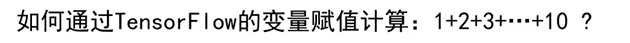

# 占位符  placeholder
tf.placeholder , 是tensorflow中特有的一种数据结构， 类似动态变量， c或python中 %占位符

tf.placeholder(dtype,shape=None,name=None)


In [ ]:
x = tf.placeholder(tf.float32,[2,3],name='tx')

In [ ]:
import tensorflow as tf
a = tf.placeholder(tf.float32,name='a')
b = tf.placeholder(tf.float32,name='b')
c = tf.multiply(a,b,name='c')

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    # 通过feed_dict的参数传值，按字典格式
    result = sess.run(c, feed_dict={a:8.0,b:3.5})
    print(result)

In [ ]:
import tensorflow as tf
a = tf.placeholder(tf.float32,name='a')
b = tf.placeholder(tf.float32,name='b')
c = tf.multiply(a,b,name='c')
d = tf.subtract(a,b,name='d')

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    result = sess.run([c,d], feed_dict={a:[8.0,2.0,3.5],b:[1.5,2.0,4]})
    print(result)
    print(result[0])

# 一次返回多个值分别赋给多个变量  feed_dict

In [ ]:
#一次返回多个值分别付给多个变量
import tensorflow as tf
a = tf.placeholder(tf.float32,name='a')
b = tf.placeholder(tf.float32,name='b')
c = tf.multiply(a,b,name='c')
d = tf.subtract(a,b,name='d')

init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)   
    # 变量的初始化 习惯性的写即可   虽然palceholder不需要
    #返回的俩个之分别赋给俩个变量
    rc,rd= sess.run([c,d],feed_dict={a:[8.0,2.0,3.5],b:[1.5,2.0,4]})
    print("value of c =",rc,"value of d=",rd)

# TensorBoard
Tensorboard 是TensorFlow的可视化工具
通过Tensorflow程序运行过程中输出的日志文件可视化tensorflow程序的运行状态
TensorBoard 和TensorFlow程序跑在不同的进程中

In [ ]:
import tensorflow as tf
tf.reset_default_graph()
#清楚default graph和不断增加的节点
logdir = 'E:/log'
#日志路径
#定义一个简单的计算图， 实现向量加法的操作
input1 = tf.constant([1.0,2.0,3.0],name='imput1')
input2 = tf.Variable(tf.random_uniform([3]),name='input2')
output = tf.add_n([input1,input2],name='add')
#生成一个写日志的writer，并将当前的Tensorflow计算写入日志
writer = tf.summary.FileWriter(logdir,tf.get_default_graph())
writer.close()

 # 启动 TensorBoard
 在Anaconda prompt 中先进入日志存放的目录
 再运行TensorBoard，并将日志的地址指向程序日志输出的地址
 命令：tensorBoard --logdir=/path/log
 启动服务的端口默认为6006， 使用 -- port参数可以改变启动服务的端口
 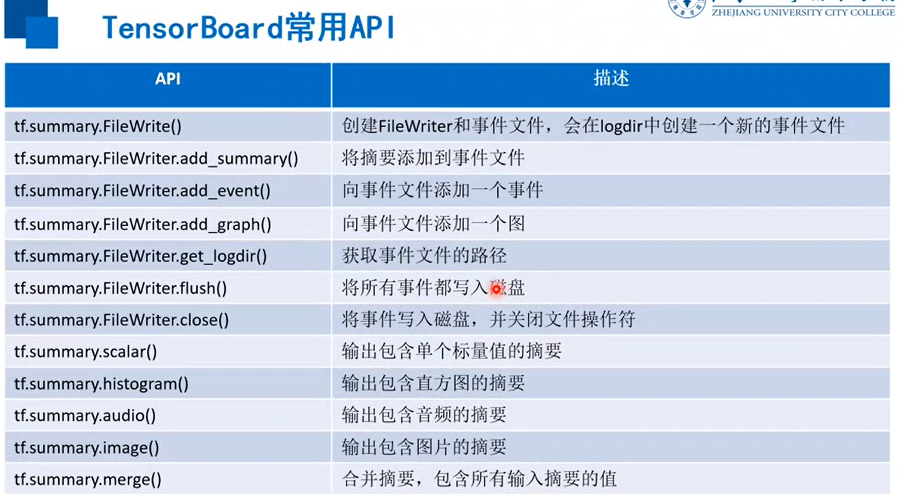

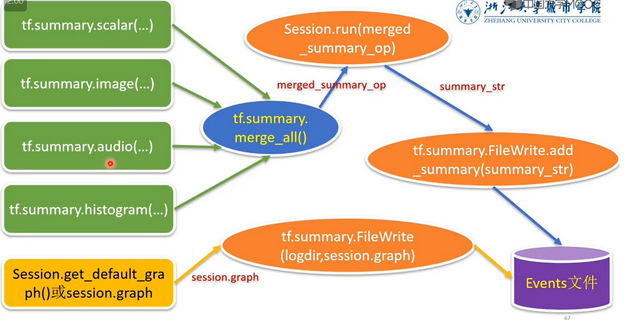

In [ ]:
# 载入数据
import tensorflow as tf
# 导入Tensorflow 提供的读取mnist的模块
import tensorflow.examples.tutorials.mnist.input_data as input_data

# 读取mnist数据
mnist = input_data.read_data_sets("E:/FIle/dppdf/data/MNIST_data/",one_hot=True)
# 定义全连接层函数
def fcn_layer(inputs,      # 输入数据
             input_dim,     # 输入神经元数量
             output_dim,    # 输出神经元数量
             activation=None):
    W=tf.Variable(tf.truncated_normal([input_dim,output_dim],stddev=0.1))
    b=tf.Variable(tf.zeros([output_dim]))
    XWb = tf.matmul(inputs,W)+b
    if activation is None:
        outputs =XWb
    else:
        outputs=activation(XWb)
    return outputs
x = tf.placeholder(tf.float32,[None,784],name="X")  # 输入样本的特征值的占位符


image_shaped_input = tf.reshape(x,[-1,28,28,1])
tf.summary.image('input',image_shaped_input,10)



h1 = fcn_layer(inputs=x,
              input_dim=784,
              output_dim=256,
              activation=tf.nn.relu)


forward = fcn_layer(inputs=h1,
                   input_dim=256,
                   output_dim=10,
                   activation=None)
pred = tf.nn.softmax(forward)


tf.summary.histogram('forward',forward)     #  前向输出值在以直方图显示

y = tf.placeholder(tf.float32,[None,10],name="Y")   # 标签的占位符
loss_function=tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits(logits=forward,labels=y))

train_epochs = 40
batch_size = 50
total_batch =int(mnist.train.num_examples/batch_size)
display_step = 1
learning_rate = 0.01

optimizer = tf.train.AdamOptimizer(learning_rate).minimize(loss_function)

correct_prediction = tf.equal(tf.argmax(y,1),tf.argmax(pred,1))  # 返回真假
accuracy = tf.reduce_mean(tf.cast(correct_prediction,tf.float32))  # cast 类型转化，


tf.summary.scalar('accuracy',accuracy)      # 将accuracy准确率以标量显示


sess= tf.Session()
sess.run(tf.global_variables_initializer())


mergerd_summary_op = tf.summary.merge_all()
writer = tf.summary.FileWriter('E:/log/',sess.graph)# 创建写入符


from time import time
startTime = time()
for epoch in range(train_epochs):
    for batch in range(total_batch):
        xs , ys = mnist.train.next_batch(batch_size) # 读取批次数据
        sess.run(optimizer,feed_dict={x:xs,y:ys}) # 执行批次训练
        summary_str=sess.run(mergerd_summary_op,feed_dict={x:xs,y:ys})
        writer.add_summary(summary_str,epoch)     # 将summary写入文件
    # total_batch 个批次训练完成后，使用验证数据计算误差与准确率
    loss,acc = sess.run([loss_function,accuracy],
                       feed_dict={x:mnist.validation.images,
                                 y:mnist.validation.labels})
    if(epoch+1)% display_step ==0:
        print("Train Epoch:",'%02d'%(epoch+1),
              "Loss=","{:.9f}".format(loss),\
             "Accuracy=","{:.4f}".format(acc))
        # 显示运行总时间
duration = time() - startTime
print("Train Finished takes:","{:.2f}".format(duration))

accu_test = sess.run(accuracy,
                    feed_dict={x:mnist.test.images,y:mnist.test.labels})
print("Test Accuracy:",accu_test)


# 机器学习系统
通过学习如何组合输入信息来对未见过的数据做出有用的预测  

https://developers.google.cn/machine-learning/crash-course/ml-intro

## 单变量线性回归
特征：预测的真实事物  
标签：描述数据的输入变量  
样本： 数据的特定实例  
有标签的样本： x,y  
无标签的样本： x,?  
模型: 将样本映射到预测标签y'  
训练模型表示通过有标签样本来学习（确定）所有权重和偏差的理想值  
在监督式学习中， 机器学习算法通过以下方式构建模型：  
 检查多个样本并尝试找出可最大限度地  减少损失  的模型这一过程称为经验风险最小化  
损失  
损失是对糟糕预测的惩罚： 损失是一个数值，表示对于单个样本而言模型预测的准确程度  
如果模型的预测完全准确，则损失为零，否则损失会较大  
训练模型的目标是从所有样本中找到一组平均损失 较小的权重和偏差
定义损失函数  
L1损失： 基于模型预测的值与标签的实际值之差的绝对值
平方损失： 一种常见的损失函数， 又称为L2损失  
均方误差（MSE）指的是每个样本的平均平方损失

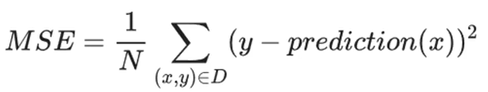

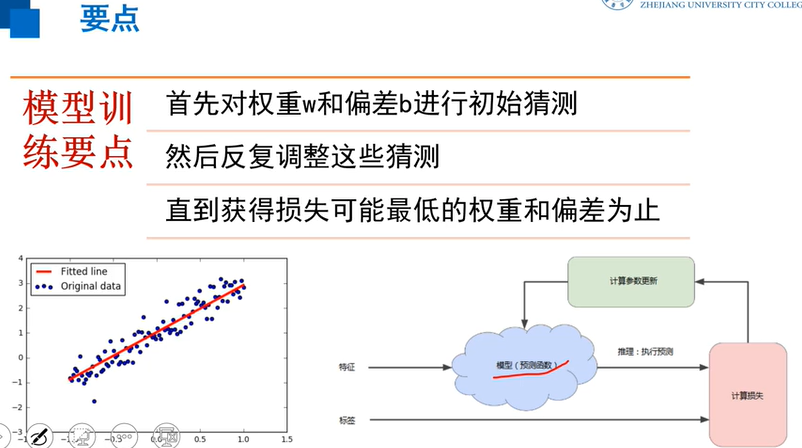  
## 收敛  
在学习优化过程中， 机器学习系统将根据所有标签去重新评估所有特征，为损失函数生成一个新值，而该值又产生新的参数值。  
通常，可以不断迭代， 知道总体损失不再变化或至少变化极其缓慢为止，称之为该模型已   收敛

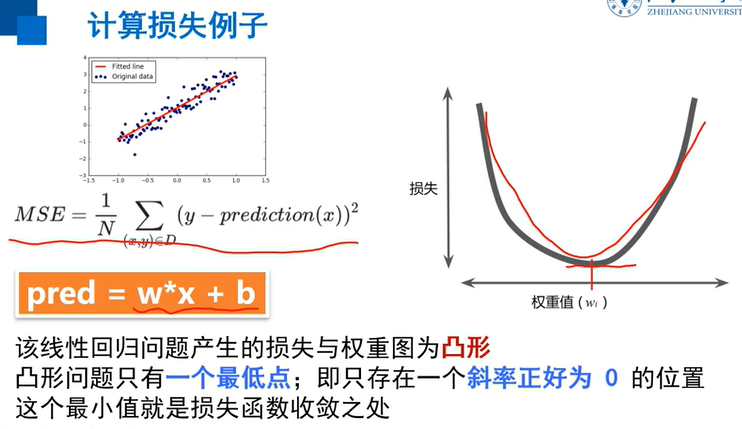

## 梯度下降法 
梯度： 一个向量， 表示某一函数在该点处的方向导数沿着该方向取得最大值， 即函数在该点处沿着该方向（此梯度的方向） 变化最快， 变化率最大
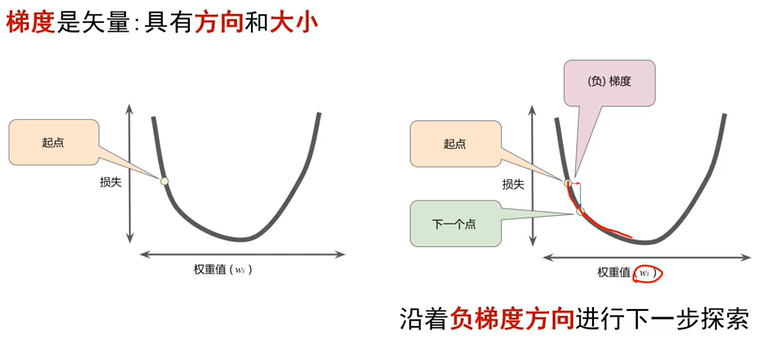

## 学习率
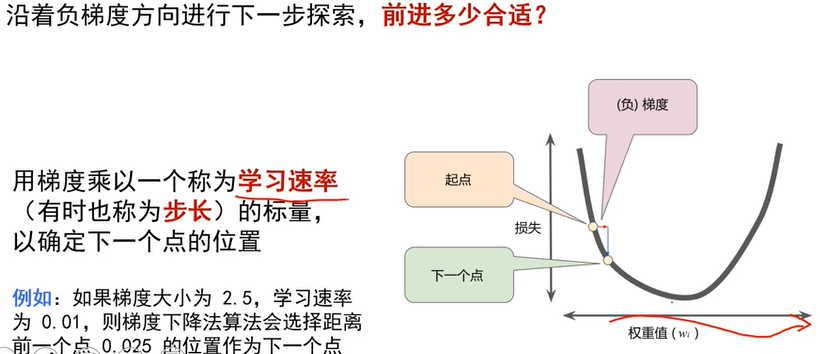

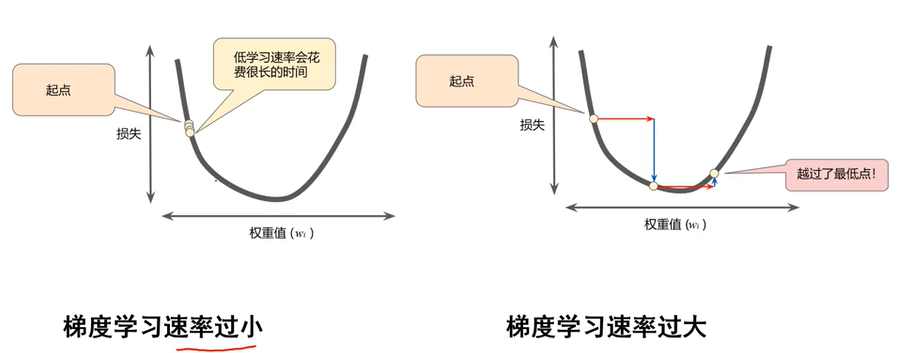

## 超参数

超参数 是在开始学习过程之前设置值的参数，而不是通过训练得到的参数数据  
通常情况下，需要对超参数进行优化，选择一组好的超参数，可以提高学习的性能和效果
超参数 是变成人员在机器学习算法中用于调整的旋钮
典型超参数：学习率、神经网络的隐含层数量....


# 线性回归问题
使用Tensorflow进行算法设计预训练的核心步骤  
1. 准备数据  
2. 构建模型  
3. 训练模型  
4. 进行预测  

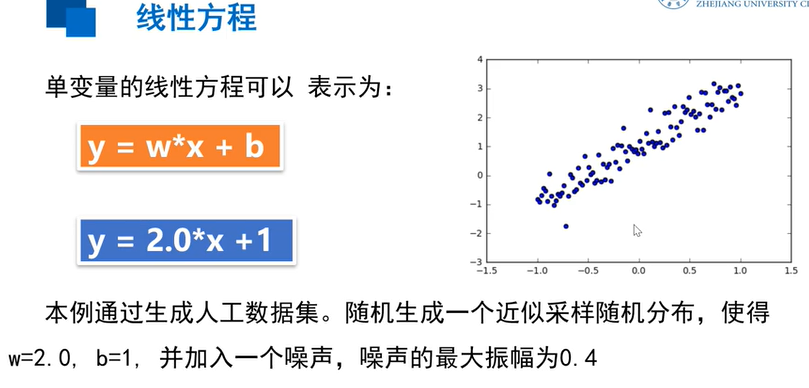

#  准备数据


In [ ]:
#在Jupyter，使用matplotlib显示图像需要设置为inline模式， 否则不会显示图像
%matplotlib inline

import matplotlib.pyplot as plt  
#载入matplotlib
import numpy as np
# 载入numpy
import tensorflow as tf
#载入tensorflow
#设置随机数种子
np.random.seed(5)

#直接采用np生成等差数列的方法，生成100个点，每个点的取值在-1~1之间
x_data = np.linspace(-1,1,100)

# y = 2x +1+噪声，其中，噪声的维度与x_data一致
y_data = 2*x_data +1.0+np.random.randn(*x_data.shape)*0.4


In [ ]:
# numpy.random.randn(d0,d1,...,dn)是从标准正态分布中返回一个或多个样本值  
#标准正态分布又称为u分布，是以0为均值，以1为标准差的正态分布，记为N(0,1)
np.random.randn(10)

In [ ]:
x_data.shape
#x_data.shape 值为一个元组

In [ ]:
np.random.randn(*x_data.shape)
# 实参的前面加上* 和**时，就意外着拆包。单个*表示将元组拆成一个个单独的实参

In [ ]:
# 本例中， np.random.randn(*x_data.shape)和 np.random.randn(100)功能相同
np.random.randn(100)

In [ ]:
y_data = 2*x_data +1.0+np.random.randn(100)*0.4 


In [ ]:
# 画出随机生成数据的散点图
plt.scatter(x_data,y_data)


In [ ]:
# 画出我们想要学习到的线性函数 y=2x+1
plt.plot(x_data,2*x_data +1.0,color = 'red',linewidth=3) 

In [ ]:
# 画出随机生成数据的散点图
plt.scatter(x_data,y_data)
# 画出我们想要学习到的线性函数 y=2x+1
plt.plot(x_data,2*x_data +1.0,color = 'red',linewidth=3) 

# 构建模型



In [ ]:
#定义训练数据的占位符，x是特征值，y是标签值
x = tf.placeholder("float",name="x")
y = tf.placeholder("float",name="y")

#定义模型函数
def model(x,w,b):
    return tf.multiply(x,w)+b

# 定义模型结构
Tensorflow变量的声明函数是tf.Variable  
tf.Variable的作用是保存和更新参数  
变量的初始值可以是随机数，常数，或是通过其他变量的初始值计算得到

In [ ]:
# 构建线性函数的斜率，变量w
w = tf.Variable(1.0,name="w0")
# 构建线性函数的截距，变量b
b = tf.Variable(0.0,name="b0")
# pred是预测值，前向计算
pred = model(x,w,b)

# 训练模型
## 设置训练参数


In [ ]:
# 迭代次数(训练轮数)
train_epochs = 10

# 学习率   经验调参
learning_rate = 0.05

## 定义损失函数
1. 损失函数用于买哦书预测值与真实值之间的误差，从而指导模型收敛方向
2. 常见损失函数： 均方差MSE和交叉熵cross-entropy


In [ ]:
 # 采用均方差作为损失函数   也叫L2 损失函数
loss_function = tf.reduce_mean(tf.square(y-pred))
# reduce_mean  取均值方法

# 定义优化器
定义优化器Optimizer,初始化一个GradientDescentOptimizer  

设置学习率和优化目标：最小化损失

In [ ]:
#梯度下降优化器 
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss_function)

# 创建会话


In [ ]:
sess = tf.Session()   # 创建sess
init = tf.global_variables_initializer()    # 初始化
sess.run(init)

In [ ]:
#for xs,ys in zip(x_data, y_data):
 #   print(xs,ys)

In [ ]:
print(x_data)

#  迭代训练
模型训练阶段，设置迭代轮次，每次通过将样本逐个输入模型，进行梯度下降优化操作每轮迭代后，绘制出模型训练

In [ ]:
# 开始训练， 轮数为epoch,采用sgd随机梯度下降优化方法

for epoch in range(train_epochs):
    for xs,ys in zip(x_data, y_data):
        _, loss=sess.run([optimizer,loss_function],feed_dict={x:xs, y:ys})
    b0temp=b.eval(session=sess)
    w0temp=w.eval(session=sess)
    plt.plot(x_data,w0temp* x_data +b0temp)    #画图

In [ ]:
print("w:",sess.run(w))
print("b:",sess.run(b))

In [ ]:
plt.scatter(x_data,y_data,label='Original data')
plt.plot(x_data,x_data *sess.run(w)+sess.run(b),label='Fitted line',color='r',linewidth=3)
plt.legend(loc=2)  # 通过参数loc指定图例位置

# 进行预测

In [ ]:
x_test= 3.21

predict=sess.run(pred, feed_dict={x:x_test})

print("预测值：%f" %predict)
target = 2*x_test +1.0
print("目标值：%f" % target)

In [ ]:
x_test = 3.21
predict = sess.run(w)*x_test +sess.run(b)
print("预测值：%f" %predict)

#### 上述是利用Tensorflow训练一个线性模型并进行预测的完整过程  

#### 通过逐渐降低损失值loss 来训练参数w和b你和y=2x+1中的系数2和1

### 利用Tensorflow 实现机器学习的思路， 重点步骤
1. 生成人工数据集及其可视化
2. 构建线性模型
3. 定义损失函数
4. 定义优化器，最小化损失函数
5. 训练结果的可视化
6. 利用学习到的模型进行预测

### 显示损失值


In [ ]:
# 开始训练，轮数为epoch，采用SGD随机梯度下降优化方法
step = 0 #记录训练步数
loss_list = [] # 用来保存loss值的列表
display_step =10
for epoch in range(train_epochs):
    for xs,ys in zip(x_data, y_data):
        _,loss = sess.run([optimizer,loss_function],feed_dict={x:xs, y:ys})
        #显示损失值 loss
        #display_step： 控制报告的粒度
        #例如 若display_step 设为2， 则将每训练2个样本输出一次损失值
        #与超参数不同，修改display_step 不会更改模型所学习的规律     
        
        loss_list.append(loss)
        step = step+1
        if step % display_step ==0:
            print("Train Epoch:",'%02d' % (epoch+1),"Step:%03d" %(step),"loss=","{:.9f}".format(loss))
        b0temp=b.eval(session=sess)
        w0temp=w.eval(session=sess)
        plt.plot(x_data,w0temp*x_data + b0temp)  # 画图
        

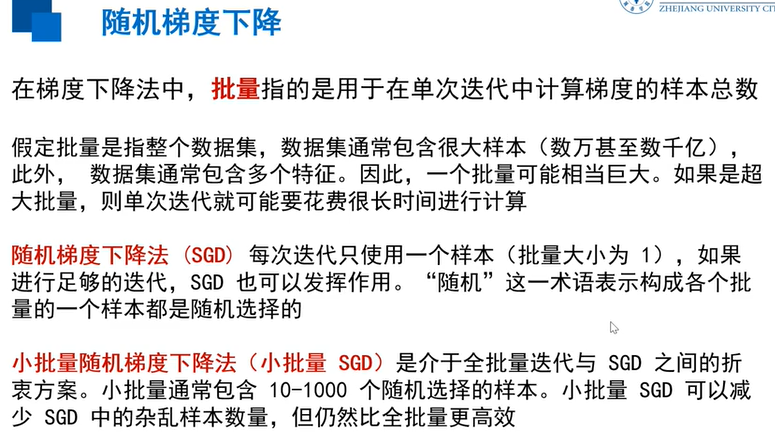

In [ ]:
plt.plot(loss_list)

In [ ]:
plt.plot(loss_list,'g+')

In [ ]:
[x for x in loss_list if x>1]   # 列表推导式